In [22]:
# -*- coding: utf-8 - Robson Duarte Vicente

"""
Análise de Dados com Árvore de Decisão - Versão Final Corrigida
"""

# Bloco 1: Importar todas as bibliotecas necessárias
import pandas as pd
import numpy as np  # Importação que estava faltando
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from google.colab import files


In [23]:
# Bloco 2: Upload e carregamento do arquivo
uploaded = files.upload()
nome_arquivo = next(iter(uploaded))
df = pd.read_excel(nome_arquivo)

Saving Rolamentos25.xlsx to Rolamentos25 (3).xlsx


In [25]:
# Bloco 3: Pré-processamento robusto (versão corrigida)
print("\nDados carregados:")
print(df.head())

# Verificar se há dados
if df.empty:
    raise ValueError("O DataFrame está vazio. Verifique o arquivo de entrada.")

# Converter colunas categóricas
colunas_categoricas = df.select_dtypes(include=['object', 'category']).columns
le_dict = {}

for col in colunas_categoricas:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Converter para string para garantir
    le_dict[col] = le
    # LINHA CORRIGIDA (agora com parênteses balanceados):
    print(f"\nMapeamento para {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Separar features e target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


Dados carregados:
  Classificação de Mancais de Rolamentos (Treinamento)             Unnamed: 1  \
0                              Diâmetro do furo (mm)    Diâmetro Externo (mm)   
1                                            66.1598                  175.048   
2                                            49.4644                  169.377   
3                                             81.846                  981.657   
4                                            59.5039                  684.376   

       Unnamed: 2           Unnamed: 3           Unnamed: 4  \
0  Largura B (mm)  Carga Dinâmica (kN)  Carga Estática (kN)   
1         8862.47                0.766               0.8093   
2         2730.17                0.515               0.9082   
3         9544.16                0.934               0.4951   
4         5072.05                0.484               0.8883   

                         Unnamed: 5                 Unnamed: 6   Unnamed: 7  \
0  Velocidade de Referência (r/min) 

In [26]:
# Bloco 4: Modelagem
modelo = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
modelo.fit(X, y)

print("\nModelo treinado com sucesso!")
print(f"Acurácia: {modelo.score(X, y):.2f}")
print("Classes do modelo:", modelo.classes_)



Modelo treinado com sucesso!
Acurácia: 1.00
Classes do modelo: [0 1 2]


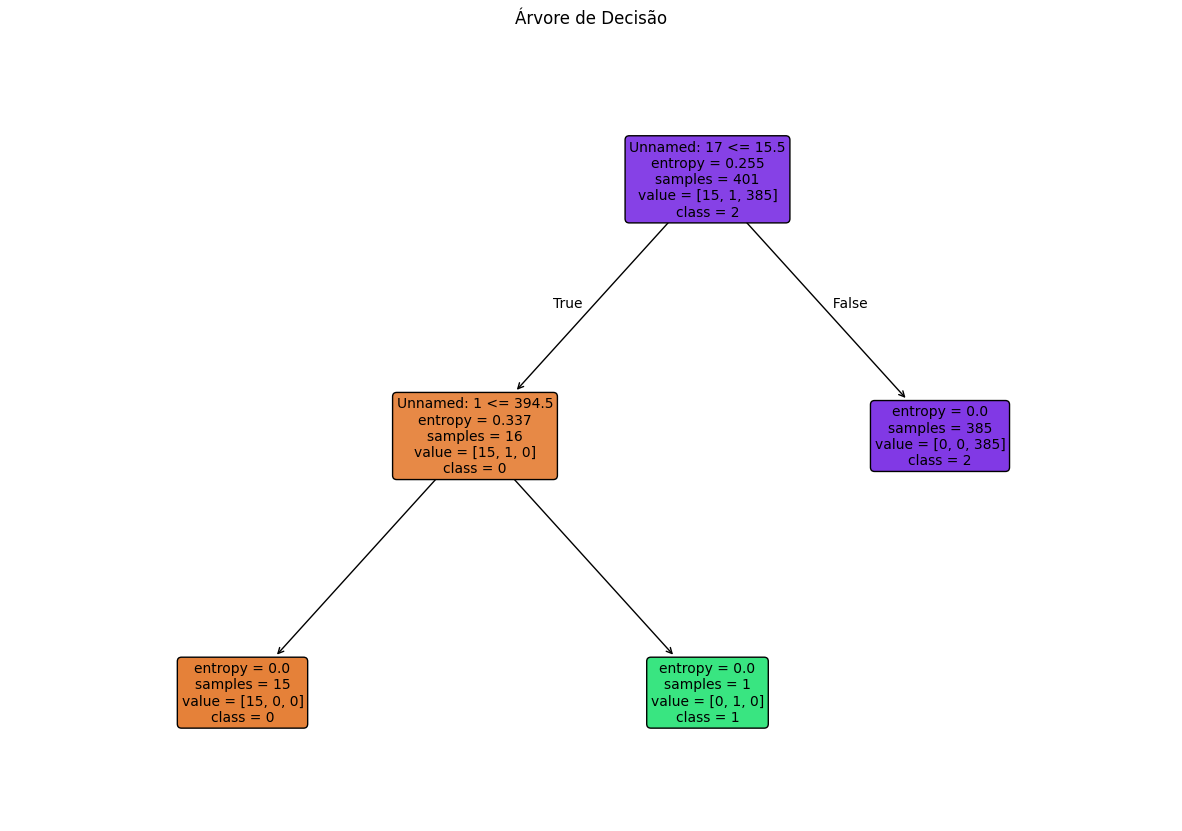

In [27]:
# Bloco 5: Visualização com tratamento completo
plt.figure(figsize=(15, 10))

try:
    # Verificação das classes
    if len(modelo.classes_) < 2:
        raise ValueError(f"O modelo encontrou apenas {len(modelo.classes_)} classe(s). São necessárias pelo menos 2.")

    # Criar nomes de classes
    class_names = [str(cls) for cls in modelo.classes_]

    plot_tree(modelo,
              feature_names=list(X.columns),
              class_names=class_names,
              filled=True,
              rounded=True,
              fontsize=10)

    plt.title("Árvore de Decisão", pad=20)
    plt.show()

except Exception as e:
    print(f"\nErro na visualização: {str(e)}")
    print("\nSolução: Verifique se sua variável target tem pelo menos duas categorias distintas.")
    print("Valores únicos em y:", np.unique(y))

In [29]:
# Bloco 6: Extração e Exibição das Regras de Decisão
try:
    print("\n" + "═"*50)
    print(" REGRAS DE DECISÃO DA ÁRVORE ".center(50, '═'))
    print("═"*50)

    # Verificar se o modelo foi treinado
    if not hasattr(modelo, 'tree_'):
        raise ValueError("Modelo não foi treinado corretamente. Execute o bloco de modelagem primeiro.")

    # Extrair regras com formatação aprimorada
    regras = export_text(
        modelo,
        feature_names=list(X.columns),
        show_weights=True,
        decimals=2,
        spacing=3
    )

    # Adicionar cabeçalho informativo
    cabecalho = f"""
    Características disponíveis: {list(X.columns)}
    Classes possíveis: {list(modelo.classes_)}
    Profundidade da árvore: {modelo.get_depth()}
    \nREGRAS:\n"""

    print(cabecalho)
    print(regras)

    # Opcional: Salvar em arquivo
    with open('regras_decisao.txt', 'w') as f:
        f.write(cabecalho)
        f.write(regras)
    print("\nRegras também salvas em 'regras_decisao.txt'")

except Exception as e:
    print(f"\nErro ao extrair regras: {str(e)}")
    print("Verifique se:")
    print("1. O modelo foi treinado corretamente")
    print("2. As feature_names correspondem às colunas de X")
    print(f"Features esperadas: {list(X.columns) if 'X' in locals() else 'Variável X não definida'}")


══════════════════════════════════════════════════
══════════ REGRAS DE DECISÃO DA ÁRVORE ═══════════
══════════════════════════════════════════════════

    Características disponíveis: ['Classificação de Mancais de Rolamentos (Treinamento)', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Classificação de Mancais de Rolamentos (Teste)', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19']
    Classes possíveis: [np.int64(0), np.int64(1), np.int64(2)]
    Profundidade da árvore: 2
    
REGRAS:

|--- Unnamed: 17 <= 15.50
|   |--- Unnamed: 1 <= 394.50
|   |   |--- weights: [15.00, 0.00, 0.00] class: 0
|   |--- Unnamed: 1 >  394.50
|   |   |--- weights: [0.00, 1.00, 0.00] class: 1
|--- Unnamed: 17 >  15.50
|   |--- weights: [0.00, 0.00, 385.00] class: 2


Regras também salvas em 'regras_decisao.txt'
